# Basic linear regression

## Import packages

First things first, let's import the packages we need:

- pandas: import and clean data
- numpy: anything to do with arrays and numbers
- matplotlib: visualize data (seaborn is also a good alternative for graphs)
- scikit-learn: machine learning package that does preprocessing, model fitting, testing

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model


## Read in dataset

In [21]:
# File path
fp = ("C:/Users/Martin Mbaya/Desktop/Parsel Tongue/IBM/Student Info Class 3/crickets.xlsx")

data = pd.read_excel(fp, sheet_name = "data" )

df_shape = data.shape
print(df_shape)
print(list(data))
data.head

(15, 2)
['Temperature', 'Chirps per minute']


<bound method NDFrame.head of     Temperature  Chirps per minute
0     20.000000          88.599998
1     16.000000          71.599998
2     19.799999          93.300003
3     18.400000          84.300003
4     17.100000          80.599998
5     15.500000          75.199997
6     14.700000          69.699997
7     17.100000          82.000000
8     15.400000          69.400002
9     16.200001          83.300003
10    15.000000          79.599998
11    17.200001          82.599998
12    16.000000          80.599998
13    17.000000          83.500000
14    14.400000          76.300003>

## Pre-process the data

Let's split the data into two arrays: the target variable (the one we're trying to predict, chirps per minute) and the independent variable (temperature)

In [25]:
# define the predictor variable
x = data.Temperature.values
print ('Shape of x: ', x.shape)

# Put the target in another DataFrame
y = data['Chirps per minute'].values
print ('Shape of y: ', y.shape)



Shape of x:  (15,)
Shape of y:  (15,)


## Plot the data

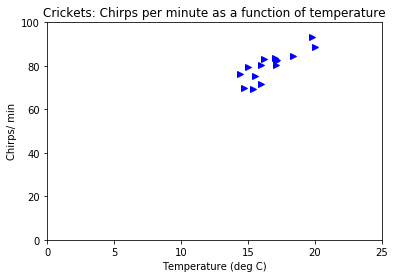

In [34]:
plt.plot(x, y, '>', color='blue');

# Range of variables
plt.axis([0, 25, 0, 100])
plt.xlabel('Temperature (deg C)')
plt.ylabel('Chirps/ min')
plt.title('Crickets: Chirps per minute as a function of temperature')

plt.show()

## Fit the model

In [36]:
lm = linear_model.LinearRegression()

# Reshapes the data from a 15, matrix to 15,1
model = lm.fit(x.reshape(-1,1), y)

In [37]:
print ('Coefficient: ', str(model.coef_))
print ('Intercept: ', str(model.intercept_))

Coefficient:  [3.29109457]
Intercept:  25.232304983426012


# # Plot the regression line 

Let's make sure that our regression fit makes sense

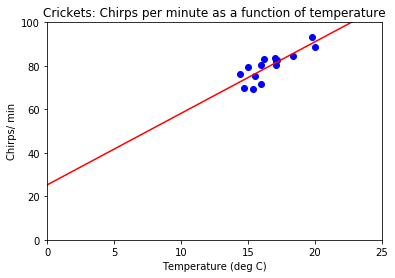

In [44]:
x_show = np.linspace(0,25)
y_show = lm.intercept_ + (lm.coef_[0] * x_show)

#fit function
f = lambda x: lm.coef_[0]*x + lm.intercept_

plt.plot(x, y, 'o', color='blue');

# Replacing y_show with f(x_show) achieves the same result
plt.plot( x_show, y_show, c ='red');

plt.axis([0, 25, 0, 100])
plt.xlabel('Temperature (deg C)')
plt.ylabel('Chirps/ min')
plt.title('Crickets: Chirps per minute as a function of temperature')

plt.show()

# # How well does our model perform?

Let's get the R^2 coefficient for our model 

In [42]:
print ('R^2: ', lm.score(x.reshape(-1, 1), y))

R^2:  0.6974651450167398
